# Population Distribution In World Cities 
## 1. Introduction
The [World cities database](https://www.kaggle.com/juanmah/world-cities) is a small data set from Kaggle. It contains an up-to-date database of the world's cities and towns. I use this dataset for the Udacity Data Scientist course because it is simple but comprehensive enough for interesting information retrieval. 

With this data base, I am interested in the following questions:
- Is population evenly distributed in world cities?
- If population is not evenly distributed in world cities, what kind of cities are more attractive for people who live in the cities?
- Cities in different countries may show different patterns when it comes to popular distribution. For example, in some countries people may prefer to live a very few cities. Other countries, however, seen their population more evenly distributed among its cities. Then, how unequally distributed people are in different countries?
- Can we predict the city’s population based on the variables in the data base?

Before going to answer these four questions, we first perform a data exploration analysis to have a general idea what exists in this data base. After that, for each question we perform an insight analysis either using descriptive statistics or using machine learning techniques. In the end, we draw our conclusions.

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import os   
import pandas as pd 
import plotly.express as px
import seaborn as sns
import os
import urllib
import pathlib 
sns.set(style="whitegrid")

Next we need download the data set, and for simplicity we assume it has been downloaded, unzipped and put in the current working directory. 

In [2]:
 
world_cities_cvs = pathlib.Path('.') / 'worldcities.csv'
assert world_cities_cvs.exists()
 

Let's read the file and see what kind of information is contained there. 

In [3]:
df = pd.read_csv(world_cities_cvs)
df.head(4)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Malishevë,Malisheve,42.4822,20.7458,Kosovo,XK,XKS,Malishevë,admin,NaN,1901597212
1,Prizren,Prizren,42.2139,20.7397,Kosovo,XK,XKS,Prizren,admin,NaN,1901360309
2,Zubin Potok,Zubin Potok,42.9144,20.6897,Kosovo,XK,XKS,Zubin Potok,admin,NaN,1901608808
3,Kamenicë,Kamenice,42.5781,21.5803,Kosovo,XK,XKS,Kamenicë,admin,NaN,1901851592


The datebase is composed of 11 columns, containing city information such as its name, its latitude and longitude, its population, the country it belongs to, the name of the highest level administration region, whether or not it is a capital of a certain level and so on. We take one record for example to understand its contents. 

In [4]:
import pprint
pprint.pprint(df[df['city']=='Brussels'].to_dict())

{'admin_name': {4568: 'Brussels-Capital Region'},
 'capital': {4568: 'primary'},
 'city': {4568: 'Brussels'},
 'city_ascii': {4568: 'Brussels'},
 'country': {4568: 'Belgium'},
 'id': {4568: 1056469830},
 'iso2': {4568: 'BE'},
 'iso3': {4568: 'BEL'},
 'lat': {4568: 50.8333},
 'lng': {4568: 4.3333},
 'population': {4568: 1743000.0}}


Then, let's how an overview of the whole database using Pandas' `info()` function 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12959 entries, 0 to 12958
Data columns (total 11 columns):
city          12959 non-null object
city_ascii    12959 non-null object
lat           12959 non-null float64
lng           12959 non-null float64
country       12959 non-null object
iso2          12928 non-null object
iso3          12959 non-null object
admin_name    12750 non-null object
capital       5180 non-null object
population    11292 non-null float64
id            12959 non-null int64
dtypes: float64(3), int64(1), object(7)
memory usage: 1.1+ MB


For numerical columns, we can also have the statistics using Pandas `describe()` function.

In [7]:
df.describe().round(2)

,lat,lng,population,id
count,12959.00,12959.00,11292.00,1.295900e+04
mean,28.08,-19.08,217727.87,1.582233e+09
std,24.00,78.41,874665.84,2.912476e+08
min,-54.93,-179.59,0.00,1.004003e+09
25%,15.28,-86.20,10580.75,1.356669e+09
50%,36.26,-46.15,32719.00,1.705132e+09
75%,42.83,33.47,125030.25,1.840009e+09
max,82.48,179.38,35676000.00,1.934000e+09


## 3. Population distribution

### 3.1 Should population evenly distributed in world cities?

The database provides precise information related to population in the cities. My personal observation is population should not be evenly distributed among all the cities. From the news as well as my personal experience, people are eager to live in big cities as big cities provide more opportunities. Does the data support it? 

In [ ]:
Let's first visualize it. Before we perform visualization, we first remove the records that do not have population information. 

In [5]:
df_cleaned_population = df.dropna(subset=['population'])
fig = px.scatter_geo(df_cleaned_population,
                     lat='lat',
                     lon='lng',
                     size='population',
                     projection='kavrayskiy7',
                     color_continuous_scale=px.colors.sequential.Plasma)
fig.show()
per = 100.0*(len(df)-len(df_cleaned_population))/len(df)
print(f"Percentage of missing data is {per}%")

Percentage of missing data is 12.863646886333822%


The visualization seems to support our assumption. In the visualization map, the dot will become large if the population is large as well. It is very clear that cities of huge amount of people exists all over the world. These super cities are surrounded by cities of less population. This can be further verified with the city population histogram:

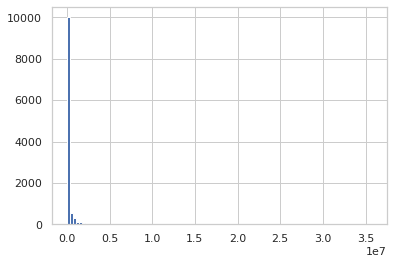

In [9]:
df_cleaned_population['population'].hist(bins=100)

In [ ]:
As we can see from the histogram, cities of small population are the majorities. This can be further confirmed by boxplot:

In [17]:
df_cleaned_population['population'].describe().round(2)

count       11292.00
mean       217727.87
std        874665.84
min             0.00
25%         10580.75
50%         32719.00
75%        125030.25
max      35676000.00
Name: population, dtype: float64

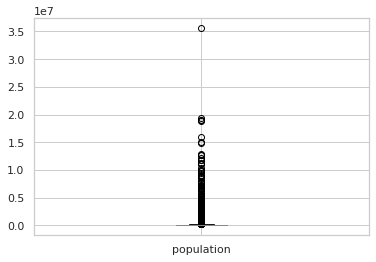

In [7]:
df_cleaned_population['population'].plot.box()

In [ ]:
The numerical statistics also support it: 75% world cities have populartion less than 13,000 people while the biggest city in terms of population has 35,676,000 people. So we can saftely say that for people who are living in cities they prefer to live in mass-population cities. 

### 3.2  Do people in all the countries follow the same pattern: population is unbalanced among cities? 

I ask this question because I do not like the idea of living in mass-population cities. It is true that mass-population cities may provide more opportunities, but it also leads to a lot of problems such as traffic jam, pollution, health and so on. Can we find some contries where most people live in moderate-population cities?

In order to answer this question, first we should define a measurement that can be used to indicate city population distribution. The measurement I select is [Gini coefficient](https://en.wikipedia.org/wiki/Gini_coefficient), which is inferred from population histogram. If people is evenly distributed in all the cities of the country, then its Gini coefficient is 0. The more unevenly distributed, the bigger the Gini coefficient is.  

valid contry percentage: 79.72350230414746


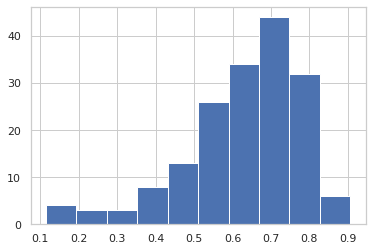

In [8]:
def gini(arr: np.array) -> float:
    """
    This function is used to calculate Gini coefficient. 

    In economics, the Gini coefficient, sometimes called the Gini index or Gini 
    ratio, is a measure of statistical dispersion intended to represent the income
    inequality or wealth inequality within a nation. Here we use it to represent 
    the inequality of population distribution in a certain country. 

    :param arr: a np.array whose rank is 1
    :return: the Gini coefficient whose while is between 0 and 1. The smaller,
     the better. It is a float value.

    """
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

# for each country, we search for its Gini coefficent
contry_population_gini = {}
import math 
for ctry in df['country'].unique():
    ar = np.array(df[df['country']==ctry]['population'])
 
    value = gini(ar)
    if(math.isnan(value)):
        pass
    else:
        if(len(ar)>1):
           contry_population_gini[ctry] = value

clean_df = df.dropna(subset=['population', 'country'])
city_num_threshold = 1

contry_population_gini = {}
valid_contry_num = 0
import math 
contry_name_list = clean_df['country'].unique()
country_sum = 0
for ctry in contry_name_list:
    ar = np.array(clean_df[clean_df['country']==ctry]['population'])
    country_sum = country_sum+1
    value = gini(ar)
    if(math.isnan(value)):
        pass
    else:
        if(len(ar)>city_num_threshold):
           contry_population_gini[ctry] = value
           valid_contry_num = valid_contry_num+1
country_pup_gini_series = pd.Series(contry_population_gini)
country_pup_gini_series.dropna(inplace=True)
country_pup_gini_series.hist()
print("valid contry percentage: "+str(valid_contry_num/country_sum*100.0))

When we do calculate the country's Gini coefficients for its population distribution, on purpose we ignore cotnries where the number of cities in this country is not more than 1. It does not make sense to do the comparison if the country has only one city. However, by doing so, around 20% countries will not be involved in our discussion. 

Unfortunately, based on the Gini statistics histogram, we can observe that the trend where population distribution is unbalanced prevails in most countries. 
 


In [43]:
country_pup_gini_series.sort_values(ascending=False)

Canada                 0.906344
Australia              0.905187
Angola                 0.892870
Bolivia                0.869212
Paraguay               0.854134
                         ...   
Slovenia               0.233756
Mauritius              0.165007
Trinidad And Tobago    0.139808
Cabo Verde             0.116192
Palau                  0.114507
Length: 173, dtype: float64

In [ ]:
It seems that Canda, Australia, Angola, Bolivia and Paraguay are among the top-five contries where population distribution is very unbalanced while Paau, Cabo Verde, Trinidad And Tobago, Mauritius and Slovenia are the top-five countries where population distribution is balanced. 

## 3.3 Which elements determines the city's population?

When we look at the items in the database, we may ask ourselves a question: which columns in the database plays critical role in determining the city's population? Let's re-check the columns we have in the database. 

In [4]:
df.columns

Index(['city', 'city_ascii', 'lat', 'lng', 'country', 'iso2', 'iso3',
       'admin_name', 'capital', 'population', 'id'],
      dtype='object')

In [ ]:
Among all the columns, our intuiation tells us the `capital`, `lat` and `lng` may determine the city's population: 
- `capital`: the administration level of the city also plays a role in determining its popluation. Our intuation is that the higher the city's adminstration level is, the larger population we can expect.  
- `lat` and `lng`: they represent latitude and longitude respectively. They may play a role in determine the city's population. An intuative example is China, where cities in the east have large population while cities in the west have small population. 

The above analysis is from our intuation, but will data in the database support it? In order to answer this question, we decide to set up a multi-variable linear regression model. The steps of setting up the model include:

**(1) Data cleaning**

The purpose of data cleaning is to identify incorrect variables and then fix them. In our case, we use a very simple data cleaning method: remove the rows that contains at least one NaN values. 

In [4]:
sel_df = df[['city','lat','lng', 'capital','population']]
sel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12959 entries, 0 to 12958
Data columns (total 5 columns):
city          12959 non-null object
lat           12959 non-null float64
lng           12959 non-null float64
capital       5180 non-null object
population    11292 non-null float64
dtypes: float64(3), object(2)
memory usage: 506.3+ KB


In [5]:
clean_df = sel_df.dropna(how="any")
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3513 entries, 39 to 12953
Data columns (total 5 columns):
city          3513 non-null object
lat           3513 non-null float64
lng           3513 non-null float64
capital       3513 non-null object
population    3513 non-null float64
dtypes: float64(3), object(2)
memory usage: 164.7+ KB


In [ ]:
**(2)Transform categorical variable into numerical variable**

If we check the datatype of the cleaned data frame `clean_df`, we will notice that the `capital` column is not numerical types. It belongs to categorical variable in essence and should be transformed into numerical types so that we can use them in the linear regression model. 

We use dummy coding to do the transformation, and it can duplicate the variable into several variables depending on the levels within the variable. We think it is reasonable method in the population estimation context because after the transformation, the `captial` variable becomes three variables: `capital_admin`,`capital_minor` and `capital_primary`. These variables provide important information regarding to the determining factors related to population estimation. 


In [6]:
df_dependent = clean_df[['lat','lng', 'capital']]
df_target = clean_df[['population']]
assert len(df_dependent) == len(df_target)

In [7]:
df_dependent_numerical = pd.get_dummies(df_dependent)
df_dependent_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3513 entries, 39 to 12953
Data columns (total 5 columns):
lat                3513 non-null float64
lng                3513 non-null float64
capital_admin      3513 non-null uint8
capital_minor      3513 non-null uint8
capital_primary    3513 non-null uint8
dtypes: float64(2), uint8(3)
memory usage: 92.6 KB


**(3) Independent variable normalization**

Normalization is needed for variable `lat` and `lng`. Since the range of the latitude is between -90 and 90 while the range of longitude is between -180 and 180, we use the following formula to calculate the normalized `lat` and `lng` variable:

  lat_normlized = (lat+90.0)/180

  lng_normlized = (lng+180)/360
  
In the literature, this normalization method is often called min-max normalization.


In [8]:
df_dependent_numerical[['lat','lng']].describe()

,lat,lng
count,3513.000000,3513.000000
mean,21.887160,16.780178
std,24.578345,67.208692
min,-54.933300,-175.220600
25%,7.760000,-15.812700
50%,23.700400,19.680000
75%,41.060000,55.730000
max,70.661300,179.216600


In [9]:
df_dependent_numerical_nromalized = df_dependent_numerical.copy()
df_dependent_numerical_nromalized['lat'] =  (df_dependent_numerical_nromalized['lat']+90.0)/180.0
df_dependent_numerical_nromalized['lng'] = (df_dependent_numerical_nromalized['lng']+180.0)/360.0
df_dependent_numerical_nromalized.describe()

,lat,lng,capital_admin,capital_minor,capital_primary
count,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000
mean,0.621595,0.546612,0.622545,0.315685,0.061771
std,0.136546,0.186691,0.484819,0.464854,0.240773
min,0.194815,0.013276,0.000000,0.000000,0.000000
25%,0.543111,0.456076,0.000000,0.000000,0.000000
50%,0.631669,0.554667,1.000000,0.000000,0.000000
75%,0.728111,0.654806,1.000000,1.000000,0.000000
max,0.892563,0.997824,1.000000,1.000000,1.000000


**(4) Linear regression model setup **

We decide to use `LinearRegression` model provided by `sklearn` library for building the linear regression model.


In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
X = df_dependent_numerical_nromalized.to_numpy()
print(X.shape)
y = df_target.to_numpy()
print(y.shape)
print(df_dependent_numerical_nromalized.head(1))
print(X[0,:])



(3513, 5)
(3513, 1)
         lat       lng  capital_admin  capital_minor  capital_primary
39  0.585304  0.622796              0              0                1
[0.58530389 0.62279611 0.         0.         1.        ]


In [11]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
print(model.intercept_)
print(model.coef_)

[421509.04479315]
[[  77633.07496747  803572.93419164 -467234.17892929 -641643.33369898
  1108877.51262828]]


**(5) Linear regression analysis**

Now let's analyze the linear regression result. First let's check the model's root mean square error (RMSR) and R2 statistics. 

In [13]:
from sklearn.metrics import r2_score, mean_squared_error
fitted = model.predict(X)
RMSE = np.sqrt(mean_squared_error(y, fitted))
r2 = r2_score(y, fitted)
print(f'RMSE:{RMSE:.0f}')
print(f'r2:{r2:.4f}')

RMSE:1335103
r2:0.0947


From the statistics, it seems that using `lat`, `lng`, `capital_admin`, `capital_minor` and `capital_primary` is not enough to predict the city's population as R2 value is 0.0947, which is low for a linear regression model. Even in this case, we can still observe that the city's administration level plays a great role in determining the population. The coefficient for `capital_primary` is a large positive number while both  `capital_admin` and `capital_minor` are negative. Moreover, `capital_minor` has a larger absolute value than `capital_admin`. Then, we can safely say that the higher the city's administration level is, the more population the city will possess. 
 

## 4. Conclusion
Take-away messages from the analysis are as follows:
- Population distribution is unbalanced happens in general all over the world, this trend can be also observed in individual countries.  

- In general people who choose to live in cities prefer to live in a very few mass-population ones. 

- It is very difficult to predict a city's population just based on the information provided in the data base. We have tried to use the city's latitude, longitude and city's adminstration level to predict the population using linear least square model. The model's prediction is not convincing but still we found that the population has a strong correlation with the city's adminstration level. 